In [18]:
%matplotlib inline  
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy

f_meas = "/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/utils/jointcal/Photometry_initial_chi2-0_g-meas.csv"
f_ref = "/sps/lsst/dev/lsstprod/hsc/SSP_UDEEP_COSMOS/utils/jointcal/Photometry_initial_chi2-0_g-ref.csv"

nt_meas = ascii.read(f_meas)
nt_ref = ascii.read(f_ref)

In [10]:
nt_meas

xccd,yccd,mag,instFlux,instFluxError,flux,fluxError,transformedFlux,transformedFluxErr,fflux,mjd,color,fsindex,ra,dec,chi2,nm,chip,visit
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,int64
1296.76,91.2338,22.2494,27137.4,411.955,1.23887e-09,1.88109e-11,1.23887e-09,1.88064e-11,1.23887e-09,56979.5,0,-1,0.214044,-0.682871,0.0,9,0,11690
437.356,138.965,19.3182,406457.0,540.576,1.85554e-08,2.54405e-11,1.85554e-08,2.46782e-11,1.85554e-08,56979.5,0,-1,0.215558,-0.719758,0.0,4,0,11690
1194.24,170.625,22.8279,16432.1,409.201,7.50153e-10,1.86824e-11,7.50153e-10,1.86807e-11,7.50153e-10,56979.5,0,-1,0.217574,-0.687232,0.0,2,0,11690
1812.63,258.518,21.9965,33075.3,409.468,1.50994e-09,1.86996e-11,1.50994e-09,1.86929e-11,1.50994e-09,56979.5,0,-1,0.222008,-0.660368,0.0,9,0,11690
1980.17,295.028,22.6618,18552.0,403.188,8.46931e-10,1.84083e-11,8.46931e-10,1.84062e-11,8.46931e-10,56979.5,0,-1,0.223786,-0.653047,0.0,9,0,11690
1903.34,321.028,22.2663,25509.1,406.401,1.16453e-09,1.85569e-11,1.16453e-09,1.85529e-11,1.16453e-09,56979.5,0,-1,0.224915,-0.65637,0.0,11,0,11690
1200.12,354.39,21.4155,58712.7,424.276,2.68033e-09,1.93895e-11,2.68033e-09,1.93689e-11,2.68033e-09,56979.5,0,-1,0.225915,-0.686819,0.0,10,0,11690
2000.03,387.807,22.1857,28932.9,405.7,1.32084e-09,1.85261e-11,1.32084e-09,1.85209e-11,1.32084e-09,56979.5,0,-1,0.22802,-0.652105,0.0,9,0,11690
1213.7,396.721,22.213,28309.1,413.605,1.29236e-09,1.88866e-11,1.29236e-09,1.88817e-11,1.29236e-09,56979.5,0,-1,0.227845,-0.686195,0.0,11,0,11690


In [11]:
nt_ref

ra,dec,mag,color,refFlux,refFluxErr,fittedFlux,fittedFluxErr,fsindex,chi2,nm
float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,int64
0.214044037,-0.682871108,22.2493805,0,8.29686166e-10,1.0506652e-10,1.23886763e-09,1.8810933e-11,-1,15.1671227,9
0.215558415,-0.719757523,19.3181729,0,2.00062885e-08,8.43534341e-11,1.85554383e-08,2.54405302e-11,-1,295.828209,4
0.217574117,-0.687232338,22.8278616,0,6.34130152e-10,2.37052183e-11,7.50153201e-10,1.86823576e-11,-1,23.9552456,2
0.222008421,-0.66036754,21.9964998,0,1.66512562e-09,3.82646304e-11,1.50994371e-09,1.8699636e-11,-1,16.4470159,9
0.223786029,-0.653046503,22.6618467,0,7.49912384e-10,2.74626489e-11,8.46931124e-10,1.84083381e-11,-1,12.4803398,9
0.224914791,-0.65637021,22.2662765,0,8.11537163e-10,3.04593605e-11,1.16453177e-09,1.85569482e-11,-1,134.305739,11
0.225914772,-0.686818638,21.4154642,0,2.94506733e-09,5.03843956e-11,2.68033191e-09,1.9389472e-11,-1,27.6078129,10
0.228020356,-0.652105247,22.1857428,0,8.61308453e-10,3.39223669e-11,1.32083632e-09,1.85260896e-11,-1,183.506481,9
0.227844741,-0.68619481,22.2129828,0,1.35460907e-09,3.57794842e-11,1.29235575e-09,1.88866432e-11,-1,3.02731004,11


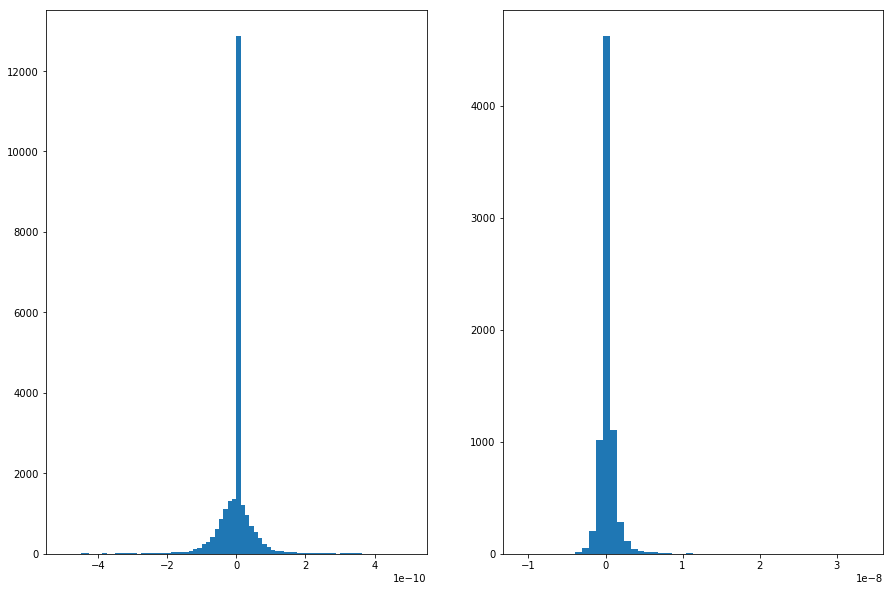

In [19]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 10))
_ = ax0.hist(nt_meas['fflux']-nt_meas['transformedFlux'], bins=80, range=[-0.5e-9, 0.5e-9])
_ = ax1.hist(nt_ref['fittedFlux']-nt_ref['refFlux'], bins=50)

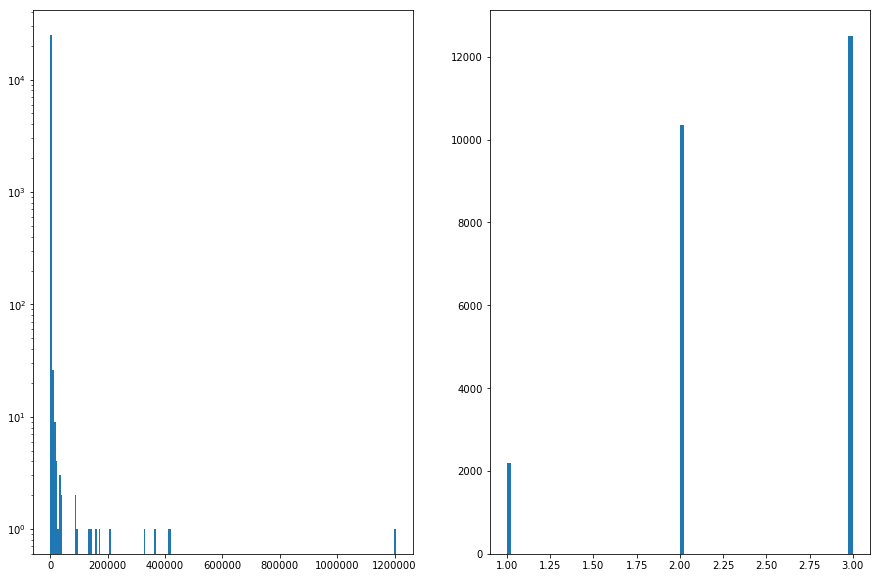

In [20]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 10))
_ = ax0.hist(nt_meas['chi2'], bins=200)
ax0.set_yscale('log')
_ = ax1.hist(nt_meas['nm'], bins=80)

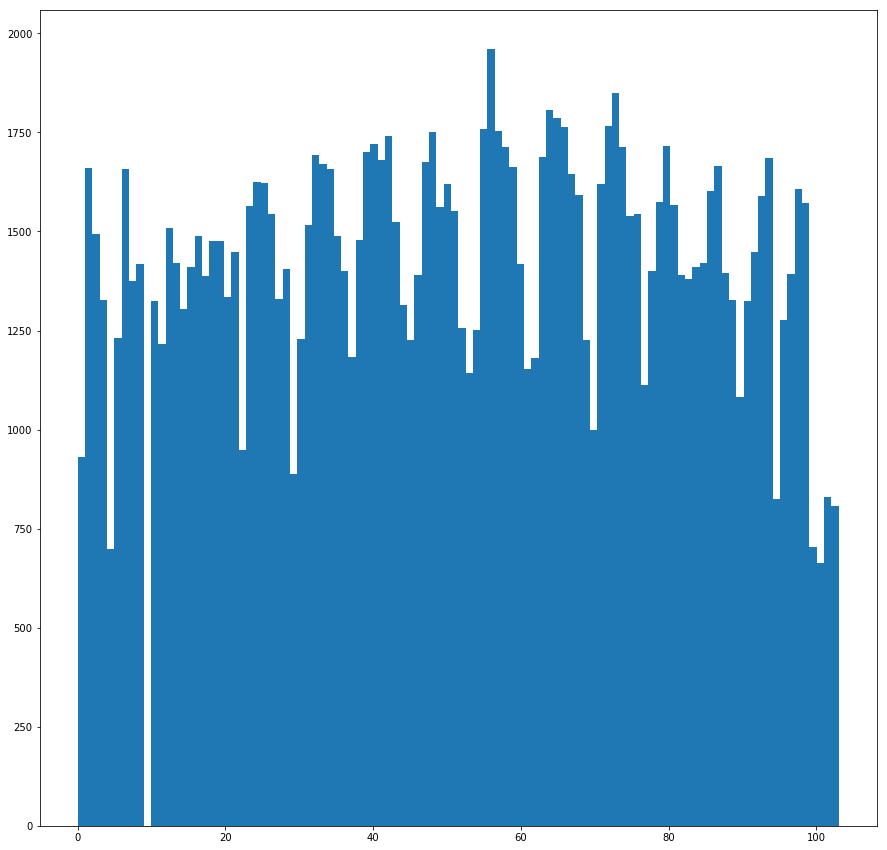

In [14]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(15, 15))
_ = ax0.hist(nt_meas['chip'], bins=104)

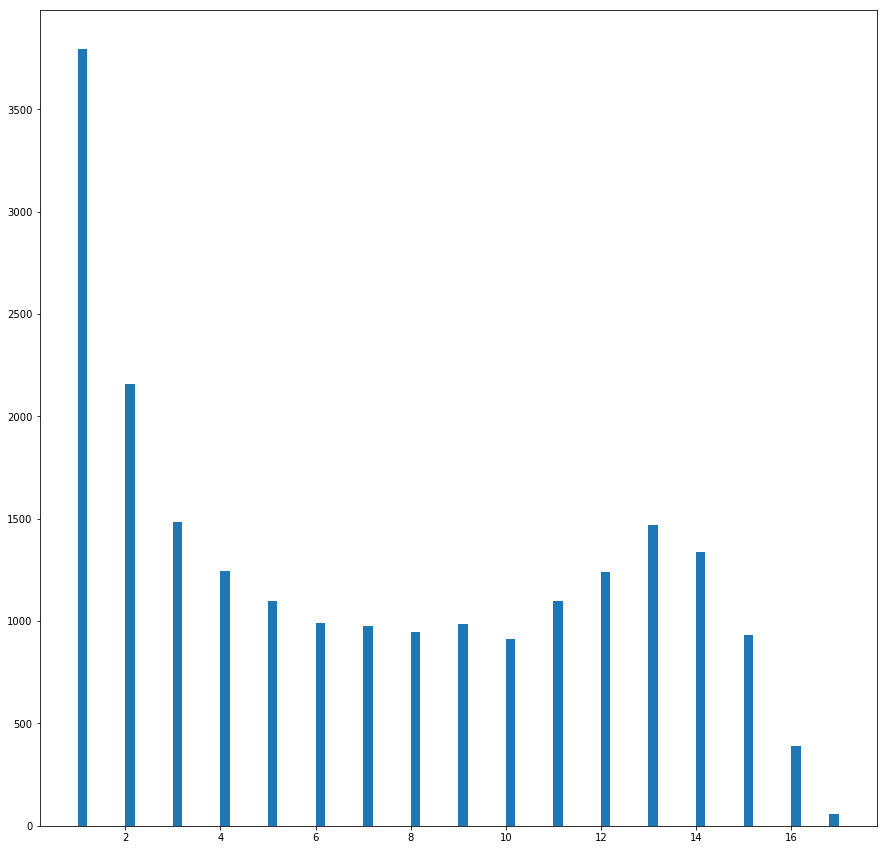

In [15]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(15, 15))
_ = ax0.hist(nt_ref['nm'], bins=80)
#ax0.set_yscale('log')

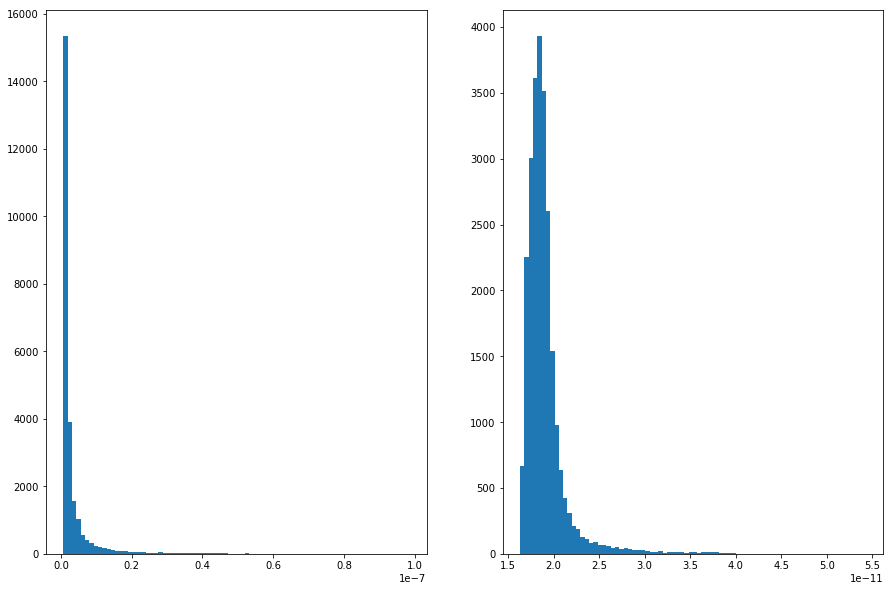

In [21]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 10))
_ = ax0.hist(nt_meas['flux'], bins=80)
_ = ax1.hist(nt_meas['fluxError'], bins=80)

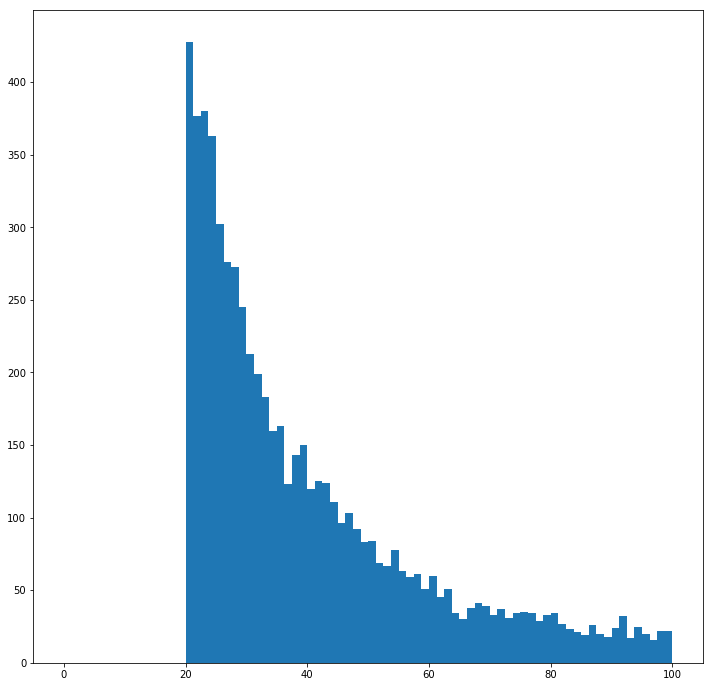

In [22]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(12, 12))
_ = ax0.hist(nt_ref['refFlux']/nt_ref['refFluxErr'], bins=80, range=[0,100])